# Importing modules

In [1254]:
import pandas as pd
import numpy as np

# Reading Data

In [1255]:
df=pd.read_csv('kaggle.csv')

In [1256]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Treating missing values

In [1257]:
#checking missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1258]:
#filling missing values of item_weight with average of item_weight
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [1259]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [1260]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Univariate Analysis

In [1261]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1262]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [1263]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [1264]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [1265]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1266]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1267]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

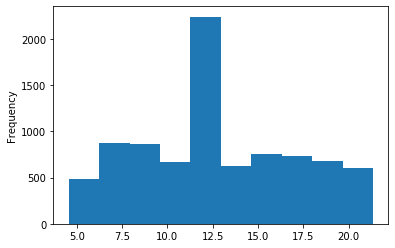

In [1268]:
df['Item_Weight'].plot.hist()

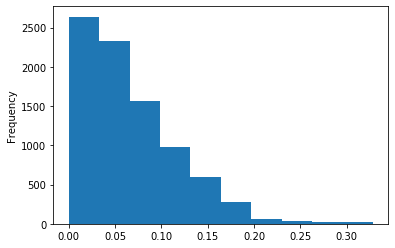

In [1269]:
df['Item_Visibility'].plot.hist()

In [1270]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

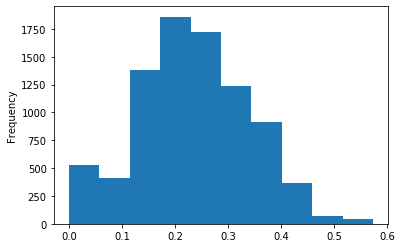

In [1271]:
df['Item_Visibility'].plot.hist()

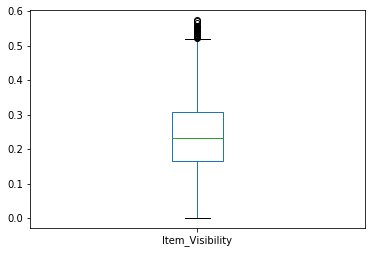

In [1272]:
df['Item_Visibility'].plot.box()

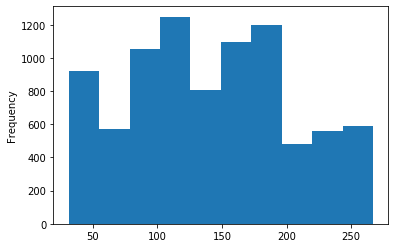

In [1273]:
df['Item_MRP'].plot.hist()

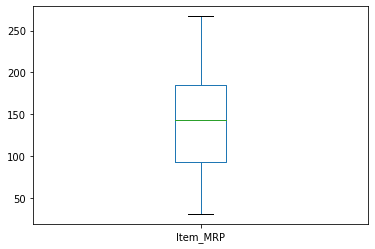

In [1274]:
df['Item_MRP'].plot.box()

In [1275]:
df=df.astype({'Outlet_Establishment_Year':'object'})

In [1276]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

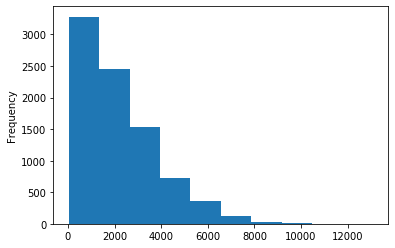

In [1277]:
df['Item_Outlet_Sales'].plot.hist()

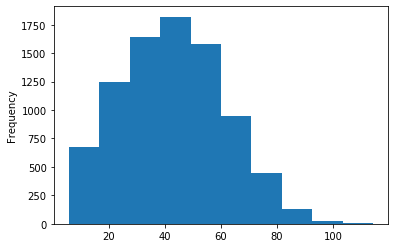

In [1278]:
np.sqrt(df['Item_Outlet_Sales']).plot.hist()

In [1279]:
df['Item_Outlet_Sales']=np.power(df['Item_Outlet_Sales'],1/3)

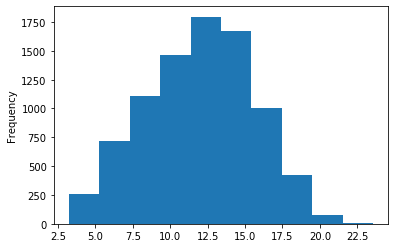

In [1280]:
df['Item_Outlet_Sales'].plot.hist()

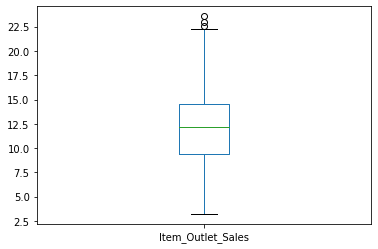

In [1281]:
df['Item_Outlet_Sales'].plot.box()

# Bivariate analysis

In [1282]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1283]:
from matplotlib import pyplot as plt

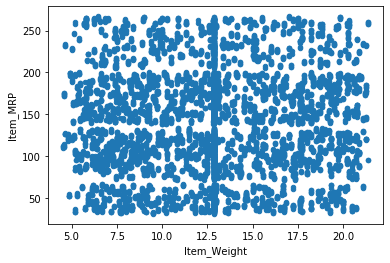

In [1284]:
df.plot.scatter('Item_Weight','Item_MRP')

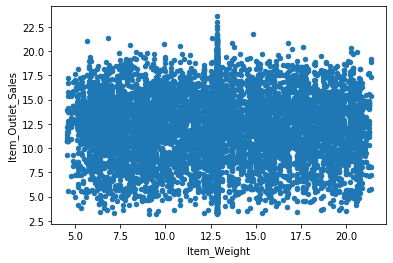

In [1285]:
df.plot.scatter('Item_Weight','Item_Outlet_Sales')

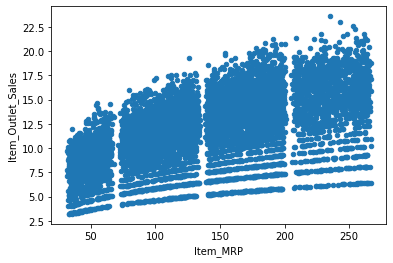

In [1286]:
df.plot.scatter('Item_MRP','Item_Outlet_Sales')

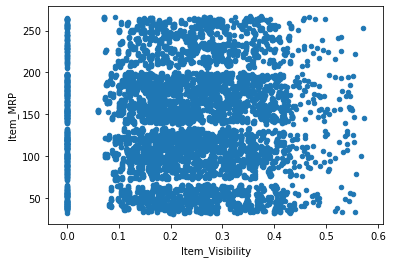

In [1287]:
df.plot.scatter('Item_Visibility','Item_MRP')

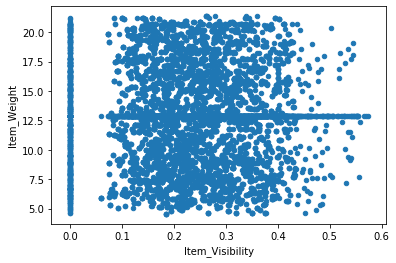

In [1288]:
df.plot.scatter('Item_Visibility','Item_Weight')

# Preprocessing

In [1289]:
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as tts

In [1290]:
x=df.drop('Item_Outlet_Sales',axis=1)

In [1291]:
y=df['Item_Outlet_Sales']

In [1292]:
x.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [1293]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [1294]:
x=pd.get_dummies(x)

In [1295]:
scaler=mms()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

# Train and Test data

In [1296]:
train_x,test_x,train_y,test_y = tts(x,y,test_size=0.33,random_state=8)

# Linear Regression

In [1297]:
from sklearn.linear_model import LinearRegression as lr

In [1298]:
reg=lr(normalize=True)

In [1299]:
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [1300]:
ypred=reg.predict(test_x)

In [1319]:
reg.score(train_x,train_y),reg.score(test_x,test_y)

(0.6764868745425168, 0.6992988099085516)

# r2_score metric for Linear regression

In [1302]:
from sklearn.metrics import r2_score as r2

In [1303]:
r2(test_y,ypred)

0.6992988099085516

# Decision Tree Regression

In [1304]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [1305]:
reg1=dtr(max_depth=5,random_state=2,splitter='best')

In [1306]:
reg1.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [1307]:
reg1.score(train_x,train_y),reg1.score(test_x,test_y)

(0.696712502807523, 0.6996292268662878)

In [1308]:
y_pred=reg1.predict(test_x)

# r2_score metric for Decision Tree regression

In [1309]:
r2(test_y,y_pred)

0.6996292268662878

# Random Forest

In [1310]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [1311]:
reg2=rfr(n_estimators=300, max_depth=5, min_samples_split=20)

In [1312]:
reg2.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1313]:
reg2.score(train_x,train_y),reg2.score(test_x,test_y)

(0.7012419235012839, 0.706439833749093)

In [1314]:
pred3=reg2.predict(test_x)

# r2_score metric for Random Forest regression

In [1315]:
r2(test_y,pred3)

0.706439833749093

# Ensembling Technique

In [1316]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([ypred[i], y_pred[i], pred3[i]]))

In [1320]:
#r2 score for ensembled data
r2_score(test_y, final_pred)

0.7098168693973461

# r2_score metric for Linear regression,decision tree and random forest

In [1318]:
r2_score(test_y, ypred), r2_score(test_y, y_pred), r2_score(test_y, pred3)

(0.6992988099085516, 0.6996292268662878, 0.706439833749093)